In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# 1. Connect (creates sales_data.db if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [32]:
# 2. Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [33]:
# 3. Insert sample data (only for demo)
sample_data = [
    (1, "Apples", 10, 2.5),
    (2, "Bananas", 5, 1.2),
    (3, "Oranges", 8, 1.8),
    (4, "Apples", 6, 2.5),
    (5, "Bananas", 9, 1.2)
]
cursor.executemany("INSERT OR IGNORE INTO sales VALUES (?, ?, ?, ?)", sample_data)
conn.commit()

In [37]:
# 5. Print results
print("=== Basic Sales Summary ===")
print(df)

=== Basic Sales Summary ===
   product  total_qty  revenue
0   Apples         16     40.0
1  Bananas         14     16.8
2  Oranges          8     14.4


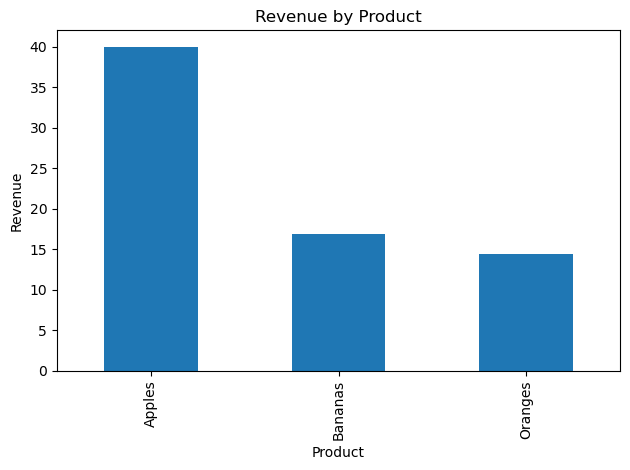

In [58]:
# 6. Plot chart
# showing how many each products are there in dataset
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Basic questions and Answers

In [ ]:
# what is highest revenue product?

In [46]:
query2 = """
SELECT product, SUM(quantity*price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 1
"""
df2 = pd.read_sql_query(query2, conn)
print(df2)

  product  revenue
0  Apples     40.0


In [51]:
# what is avg sales?

In [52]:
query3 = """
SELECT AVG(quantity * price) AS avg_order_value FROM sales;
"""
df3 = pd.read_sql_query(query3, conn)
print(df3)

   avg_order_value
0            14.24


In [ ]:
# what Total quantity and revenue by product?

In [54]:
query4 = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity*price) AS revenue
FROM sales
GROUP BY product;
"""
df4 = pd.read_sql_query(query4, conn)
print(df4)

   product  total_qty  revenue
0   Apples         16     40.0
1  Bananas         14     16.8
2  Oranges          8     14.4


In [ ]:
#what is total_orders?

In [55]:
query5 = """
SELECT COUNT(*) AS total_orders FROM sales;
"""
df5 = pd.read_sql_query(query5, conn)
print(df5)


   total_orders
0             5


In [ ]:
#closing the database connect to that file where data is present 

In [56]:
conn.close()

In [61]:
# Connect to database
conn = sqlite3.connect("sales_data.db")
with open("sales_data.sql", "w") as f:
    for line in conn.iterdump():   # iterdump generates all SQL commands
        f.write(f"{line}\n")
conn.close()
